In [2]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
aapl = yf.download('AAPL','2016-01-01','2024-01-01')
print(aapl.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.977474  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.376619  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.919140  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.951851  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.067926  283192000


In [4]:
x = np.array(aapl.index)
y = np.array(aapl['Adj Close'])

In [5]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices = [1],
                  initial_state_mean=20,
                  initial_state_covariance=1,
                  transition_covariance=.015)

filtrado, _ = kf.filter(y)

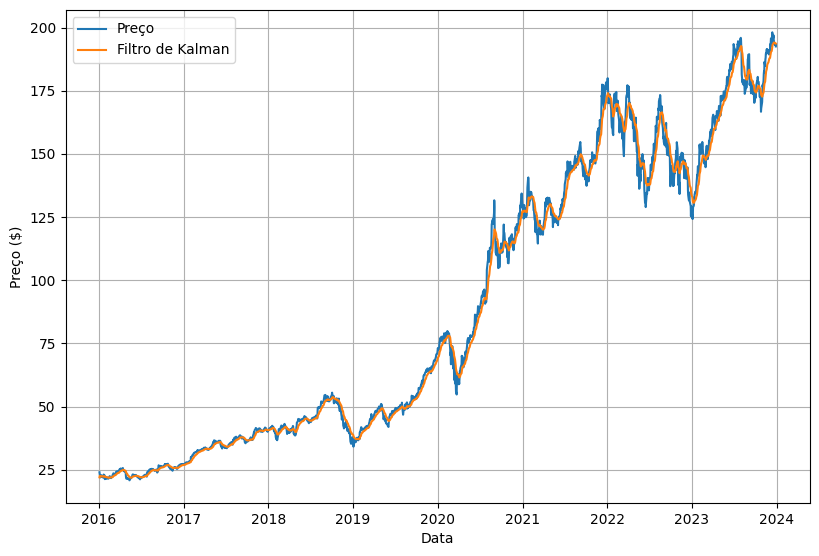

In [6]:
plt.figure(figsize = (9.6,6.4))
plt.plot(x,y,label = 'Preço')
plt.plot(x,filtrado, label = 'Filtro de Kalman')
plt.xlabel('Data')
plt.ylabel('Preço ($)')
plt.grid()
plt.legend()
plt.show()